In [640]:
from scipy.integrate import odeint

# Activation dynamics

## Overly (?) simplistic idea

Benoît C. FORGET
april '15

In [641]:
def pulse(t,tstart=10,tdur=50):

    if shape(t) == () :
        if (t>tstart) & (t<(tstart+tdur)):
            pulse=1.0
        else:
            pulse=0.0
    else:
        pulse=zeros(shape(t))
        pulse[where((t>tstart) & (t<(tstart+tdur)))]=1.0
    return pulse    

In [642]:
def n_pulse(t,tstart=10,tdur=50,trep=100.0):

    if shape(t) == () :
        if (t%trep>tstart) & (t%trep<(tstart+tdur)):
            pulse=1.0+int8(t/trep)
        else:
            pulse=0.0
    else:
        pulse=zeros(shape(t))
        pulse[where(((t%trep)>tstart) & ((t%trep)<(tstart+tdur)))]=1.0+int8(t[where(((t%trep)>tstart) & ((t%trep)<(tstart+tdur)))]/trep)
    return pulse    

In [643]:
def ode_model(y,t):
    
    dy=array([  A20*(1-y[0]-y[1]) + A10*y[1] - B01*n_pulse(t)*y[0],
                B01*n_pulse(t)*y[0] - A10*y[1] - A12*y[1] ,
                -A20*(1-y[1]-y[0]) +A12*y[1] ])
        
    return dy

## A 2 level mode (... sorry for the notation)

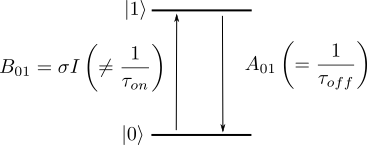

In [644]:
from IPython.display import Image
Image(filename='figures/2levels.png')

The rate equations are :

\begin{align}
\frac{d |0\rangle}{dt} & = -B_{01}|0\rangle + A_{10}|1\rangle  \\
\frac{d |1\rangle}{dt} & = B_{01}|0\rangle - A_{10}|1\rangle 
\end{align}

We can replace the second equation with the conservation :
$$|0\rangle + |1\rangle  = 1 $$

In steady state :

$$ \frac{d |0\rangle}{dt} = 0 \quad\to\quad -B_{01}\left(1-|1\rangle\right) + + A_{10}|1\rangle = 0 $$

$$ |1\rangle_{ss} = \frac{B_{01}}{B_{01}+A_{01}} $$

In [645]:
A12=0.0
A10=0.5
B01s=logspace(-1,1.5,10)
A20=0.0

t=linspace(0,100,200)
y0=array([1.,0, 0.])

Imax=[]
Iss=[]

figure(figsize=(10,5))

for B01 in B01s:
    v=odeint(ode_model,y0,t)
    subplot(121), plot(t,v[:,1]);
    Imax.append(max(v[:,1]))
    Iss.append(v[80,1]) 
    
subplot(122),plot(B01s,Iss,'o',B01s,B01s/(A10+B01s));
title(r'S-state current as a function of $I$ ($B_{01}$)')

No "overshoot" of the steady state current value (left).

This steady-state current shows a typical saturation curve (right).

Ici on a une solution analytique si l'intensité (donc $B_{01}$) est constante:

$$ \frac{d |1\rangle}{dt} = B_{01}\left(1-|1\rangle\right) - A_{10}|1\rangle = B_{01} - \left(B_{01}+A_{01}\right) |1\rangle   $$

On trouve facilement :

$$ |1\rangle = \left\{
            \begin{array}{l}
                |1\rangle_{ss}\left(1-e^{-\left(B_{01}+A_{10}\right)t}\right) \\
                |1\rangle_{ss} e^{-A_{10}t}
            \end{array} \right.    
$$


0.5


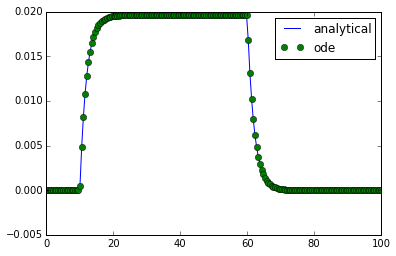

In [646]:
analyt=zeros(shape(t))
during_pulse=where((t>10) & (t<60))
after_pulse=where( t>= 60)
B01=0.01;
Iss=B01/(A10+B01)
analyt[during_pulse]=Iss*(1.0-exp(-(A10+B01)*(t[during_pulse]-10.0)))
analyt[after_pulse]=Iss*exp(-A10*(t[after_pulse]-60.0))

print(A10)
v=odeint(ode_model,y0,t)

plot(t,analyt,t,v[:,1],'o')
legend(['analytical', 'ode'])

## A 3 level model (inactive state)

In [647]:
from IPython.display import Image
Image(filename='figures/3levels.png')

The rate equations are :

\begin{align}
    \frac{d |0\rangle}{dt} & = -B_{01}|0\rangle + A_{10}|1\rangle + A_{20}|2\rangle \\
    \frac{d |1\rangle}{dt} & = +B_{01}|0\rangle - A_{10}|1\rangle - A_{12}|1\rangle \\
    \frac{d |2\rangle}{dt} & = +A_{12}|1\rangle -A_{20}|2\rangle
\end{align}    

We can replace the third equation with the conservation :
$$    |0\rangle + |1\rangle + |2\rangle  = 1 $$

In steady state :

$$ \left. \begin{array}{l} 
 \frac{d |0\rangle}{dt} = 0 \\
 \frac{d |0\rangle}{dt} = 0
 \end{array} \right\}
  \quad\to\quad 
 \left\{ \begin{array}{l}  
 -B_{01}|0\rangle + A_{10}|1\rangle + A_{20}\left(1- |0\rangle - |1\rangle \right) = 0 \\
 +B_{01}|0\rangle - A_{10}|1\rangle - A_{12}|1\rangle =0
  \end{array} \right.
 $$    
    
    
$$|1\rangle_{ss} = \frac{B_{01}}{B_{01}\left(1+\frac{A_{12}}{A_{20}}\right)+\left(A_{10}+A_{12}\right)}    $$

Still a typical saturation curve but different than the the "2 levels" version. 

If $A_{12} \to 0$ (meaning impossible to got to the $|2\rangle$ state) we get the same result

In [1]:
A12=0.15
A10=0.25
B01s=logspace(-1,1,10)
A20=0.5

t=linspace(0,100,200)
y0=array([1.,0, 0.])

Imax=[]
Iss=[]

figure(figsize=(10,5))
for B01 in B01s:
    v=odeint(ode_model,y0,t)
    subplot(121), plot(t,v[:,1])
    Imax.append(max(v[:,1]))
    Iss.append(v[80,1]) 
    
Iss_2Lmodel= B01s/(A10+B01s);  
Iss_3Lmodel= B01s/((A10+A12)+B01s*(1+A12/A20));  

subplot(122),plot(B01s,Iss,'o',B01s, Imax,'*', B01s, Iss_2Lmodel, B01s, Iss_3Lmodel ,lw=2) ;  
legend(['SState','Max','2 levels model', '3 levels model'],loc=4)
title(r'S-state current as a function of $I$ ($B_{01}$)')

NameError: name 'logspace' is not defined

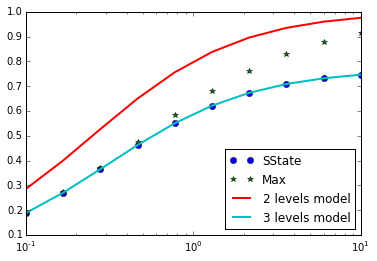

In [649]:
semilogx(B01s,Iss,'o',B01s, Imax,'*', B01s, Iss_2Lmodel, B01s, Iss_3Lmodel ,lw=2) ;  
legend(['SState','Max','2 levels model', '3 levels model'],loc=4)

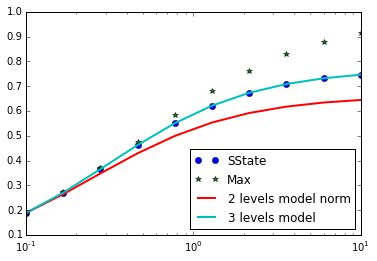

In [650]:
semilogx(B01s,Iss,'o',B01s, Imax,'*', B01s, Iss_2Lmodel/Iss_2Lmodel[0]*Iss_3Lmodel[0], B01s, Iss_3Lmodel ,lw=2) ;  
legend(['SState','Max','2 levels model norm', '3 levels model'],loc=4)

$I_{max} \neq I_{ss}$ of course. The overshoot is a signature (?) of inactivation.

The fit is good for low values of $I$ ($B_{01}$) but the difference with the "2 levels" is important from the start.

Par ailleurs, pour la décroissance :

$$ |1\rangle = |1\rangle e^{-\left(A_{10}+A_{12}\right)t}$$

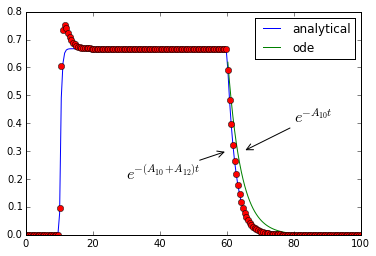

In [651]:
analyt=zeros(shape(t))
during_pulse=where((t>10) & (t<60))
after_pulse=where( t>= 60)
B01=2.01;
Iss=B01/((A10+A12)+B01*(1+A12/A20));
Iss2=B01/(A10+A12+B01)
analyt[during_pulse]=Iss*(1.0-exp(-(A10+A12+B01)*(t[during_pulse]-10.0)))
analyt[after_pulse]=Iss*exp(-(A10+A12)*(t[after_pulse]-60.0))

bad=Iss*exp(-(A10)*(t[after_pulse]-60.0))

v=odeint(ode_model,y0,t)

plot(t,analyt,t[after_pulse],bad,t,v[:,1],'o')
legend(['analytical', 'ode'])

annotate(r'$e^{-A_{10}t}$', xy=(65, 0.3), xytext=(80, 0.4), size=16,
            arrowprops=dict(arrowstyle='->'))

annotate(r'$e^{-\left(A_{10}+A_{12}\right)t}$', xy=(60, 0.3), xytext=(30, 0.2), size=16,
            arrowprops=dict(arrowstyle='->'))


In [652]:
analyt=zeros(shape(t))
during_pulse=where((t>10) & (t<60))
after_pulse=where( t>= 60)
B01=0.11;
Iss=B01/((A10+A12)+B01*(1+A12/A20));
Iss2=B01/(A10+A12+B01)
analyt[during_pulse]=Iss*(1.0-exp(-(A10+A12+B01)*(t[during_pulse]-10.0)))
analyt[after_pulse]=Iss*exp(-(A10+A12)*(t[after_pulse]-60.0))

bad=zeros(shape(t))
bad[during_pulse]=Iss2*(1.0-exp(-(A10+B01)*(t[during_pulse]-10.0)))
bad[after_pulse]=Iss2*exp(-(A10)*(t[after_pulse]-60.0))

v=odeint(ode_model,y0,t)

plot(t,analyt,t,bad,t,v[:,1],'o')
legend(['analytical','bad', 'ode'])

print(Iss2)

annotate(r'$e^{-A_{10}t}$', xy=(65, 0.04), xytext=(80, 0.05), size=16,
            arrowprops=dict(arrowstyle='->'))

annotate(r'$e^{-\left(A_{10}+A_{12}\right)t}$', xy=(60, 0.03), xytext=(30, 0.02), size=16,
            arrowprops=dict(arrowstyle='->'))

annotate(r'$1-e^{-(A_{10}+B_{01})t}$', xy=(18, 0.18), xytext=(25, 0.15), size=16,
            arrowprops=dict(arrowstyle='->'))

annotate(r'$1-e^{-\left(A_{10}+A_{12}+B_{01}\right)t}$', xy=(16, 0.19), xytext=(-0.5, 0.21), size=16,
            arrowprops=dict(arrowstyle='->'))

0.21568627451


In [653]:
analyt=zeros(shape(t))
during_pulse=where((t>10) & (t<60))
after_pulse=where( t>= 60)
B01=0.1;
Iss=B01/((A10+A12)+B01*(1+A12/A20));
Iss2=B01/(A10+A12+B01)
analyt[during_pulse]=Iss*(1.0-exp(-(A10+A12+B01)*(t[during_pulse]-10.0)))
analyt[after_pulse]=Iss*exp(-(A10+A12)*(t[after_pulse]-60.0))

bad=zeros(shape(t))
bad[during_pulse]=Iss*(1.0-exp(-(A10+B01)*(t[during_pulse]-10.0)))
bad[after_pulse]=Iss*exp(-(A10)*(t[after_pulse]-60.0))

v=odeint(ode_model,y0,t)

plot(t,analyt,t,bad,t,v[:,1],'o')
legend(['analytical','bad', 'ode'])

annotate(r'$e^{-A_{10}t}$', xy=(65, 0.04), xytext=(80, 0.05), size=16,
            arrowprops=dict(arrowstyle='->'))

annotate(r'$e^{-\left(A_{10}+A_{12}\right)t}$', xy=(60, 0.03), xytext=(30, 0.02), size=16,
            arrowprops=dict(arrowstyle='->'))

annotate(r'$1-e^{-(A_{10}+B_{01})t}$', xy=(18, 0.18), xytext=(25, 0.15), size=16,
            arrowprops=dict(arrowstyle='->'))

annotate(r'$1-e^{-\left(A_{10}+A_{12}+B_{01}\right)t}$', xy=(16, 0.19), xytext=(-0.5, 0.21), size=16,
            arrowprops=dict(arrowstyle='->'))

## Fitting

In [654]:
from scipy.optimize import curve_fit

In [655]:
t=linspace(0,300,2000)
plot(t,n_pulse(t))

[ 0.39513935  0.20217351  0.50262343  1.05137683]


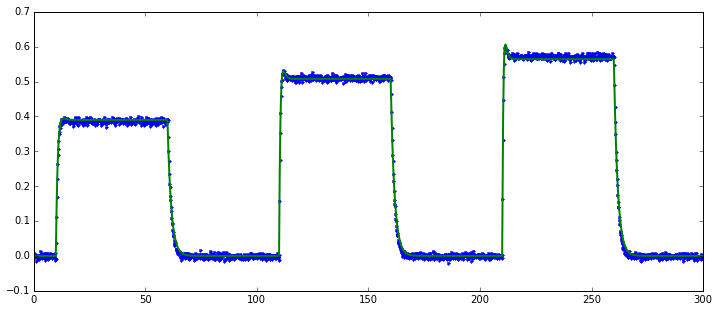

In [656]:
A12=0.5
A10=0.25
B01=0.6
A20=1.5

t=linspace(0,300,2000)

y0=array([1.,0, 0.])
data=odeint(ode_model,y0,t)[:,1]+0.005*randn(size(t))

def fit_func(t,A12,A10,B01,A20):
    y0=array([1.,0, 0.])
    def myfittedode(y,t):
        return array([A20*(1-y[0]-y[1]) + A10*y[1] - B01*n_pulse(t)*y[0],
                  + B01*n_pulse(t)*y[0] - A10*y[1] - A12*y[1] ,
                  -A20*(1-y[1]-y[0]) +A12*y[1] ])

    
    model=odeint(myfittedode,y0,t)[:,1]
    
    return model

popt, pcov= curve_fit(fit_func,t,data,p0=[0.5,0.25,0.35,1.0],sigma=0.01*ones(shape(t)))
print(popt)
A12,A10,B01,A20=popt
fit=odeint(ode_model,y0,t)[:,1]
figure(figsize=(12,5))
plot(t,data,'.',t,fit,lw=2);

In [657]:
perr = sqrt(diag(pcov))
print(perr)
print(100*perr/popt)

[  1.17589644e-03   6.37348535e-04   8.94731959e-12   4.02343123e-03]
[  2.97590316e-01   3.15248286e-01   1.78012386e-09   3.82682128e-01]


##Moving spot (1D line)

Let's consider a moving spot moving along a line at constant speed $v$ :

$$ I(x,t) \;\to\; I(x-vt) \;\to\; u=x-vt $$



$$ N_i(x,t)=N_i(u) \;\to\; \frac{\partial N_i}{\partial t}=\frac{\partial N_i}{\partial u}\frac{\partial u}{\partial t} = -v \frac{\partial N_i}{\partial u}$$


$$    \frac{d N_0}{du}  = \frac{B_{01}I(u)}{v}N_0(u) - \frac{A_{10}}{v} \left(1 - N_0(u)\right) $$    


In [658]:
def ode_moving_model(y,t):
    
    dy=-(0.7*exp(-(x-1.0*t)**2/4.0)+0.25) * y + 0.25    
    return dy

In [659]:
t=linspace(0,20,100)
raster_line=linspace(0,10,100)
s=zeros((100,100))

for idx in range(100):
    x=raster_line[idx]
    s[idx,:]=1.0-odeint(ode_moving_model,1,t)[:,0]
    plot(t,s[idx,:])

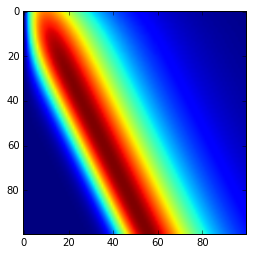

In [660]:
imshow(s)

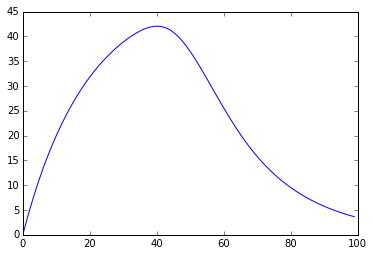

In [661]:
plot(sum(s,axis=0))

In [662]:
def ode_moving_model(y,t):
    
    dy=-(0.7*exp(-(x-24.0/20.*t**2)**2/4.0)+0.25) * y + 0.25    
    return dy

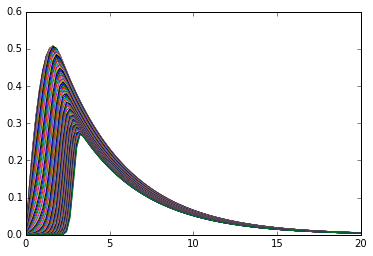

In [663]:
t=linspace(0,20,100)
raster_line=linspace(0,10,100)
s2=zeros((100,100))

for idx in range(100):
    x=raster_line[idx]
    s2[idx,:]=1.0-odeint(ode_moving_model,1,t)[:,0]
    plot(t,s2[idx,:])

In [664]:
imshow(s2)

In [665]:
plot(t,sum(s,axis=0),t,sum(s2,axis=0))